# **Analyse, transform, and evaluate the data downloaded**

In [8]:
from extract_data.export import get_country_gauge_coords
from extract_data.plots import get_custom_palette
from extract_data.plots import set_plot_style
from extract_data.plots import map_gauge_coordinates_of_country
from extract_data.plots import plot_danger_levels_hist
from extract_data.plots import plot_gauge_forecast_for_issue_time
from extract_data.plots import plot_week_of_gauge_forecast_for_issue_time
from extract_data.plots import plot_x_days_of_gauge_forecast_for_issue_time

In [2]:
import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def import_country_data(country: str) -> pd.DataFrame:
    """
    Imports three pieces of data for a given country:
    - metadata per country (eg containing the gauges and their coordinates)
    - metadata per gauge (eg containing the danger levels)
    - forecast data per gauge
    """
    df_gauges = pd.read_csv(
        f"../data/processed/gauge_metadata_per_country/gauge_meta_{country}.csv",
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )
    df_gauge_meta = pd.read_csv(
        f"../data/processed/metadata/metadata_gauges_{country}.csv",
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )
    df_forecasts = pd.read_csv(
        "../data/floods-data/mali/2024-07-08_to_2024-10-08.csv", 
        index_col = 0,
        sep = ';',
        decimal = '.',
        encoding = 'utf-8'
    )

    return df_gauges, df_gauge_meta, df_forecasts

In [11]:
df_Mali_gauges, df_Mali_gauge_models, df_Mali_forecasts = import_country_data('Mali')
df_Kenya_gauges, df_Kenya_gauge_models, df_Kenya_forecasts = import_country_data('Kenya')
df_Zambia_gauges, df_Zambia_gauge_models, df_Zambia_forecasts = import_country_data('Zambia')

In [5]:
print(len(df_Mali_gauges), len(df_Mali_gauge_models), len(df_Mali_forecasts))
print(len(df_Kenya_gauges), len(df_Kenya_gauge_models), len(df_Kenya_forecasts))
print(len(df_Zambia_gauges), len(df_Zambia_gauge_models), len(df_Zambia_forecasts))

16 16 11776
3 3 11776
46 46 11776


In [16]:
df_Mali_gauge_models

,siteName,source,river,gaugeId,qualityVerified,latitude,longitude
0,NaN,HYBAS,NaN,hybas_1120758950,True,11.427083,-6.581250
1,NaN,HYBAS,Sankarani,hybas_1120766460,True,11.222917,-8.485417
2,NaN,HYBAS,NaN,hybas_1120739110,True,11.977083,-6.360417
3,NaN,HYBAS,NaN,hybas_1120679780,True,13.493750,-6.202083
4,NaN,HYBAS,NaN,hybas_1121893090,True,14.131250,-5.039583
5,NaN,HYBAS,NaN,hybas_1120641660,True,14.506250,-4.206250
6,NaN,HYBAS,NaN,hybas_1121895840,True,13.956250,-5.360417
7,NaN,HYBAS,NaN,hybas_1120650110,True,14.277083,-6.927083
8,NaN,HYBAS,Niger,hybas_1121919510,True,12.410417,-8.106250
9,NaN,HYBAS,NaN,hybas_1120689830,True,13.210417,-7.077083


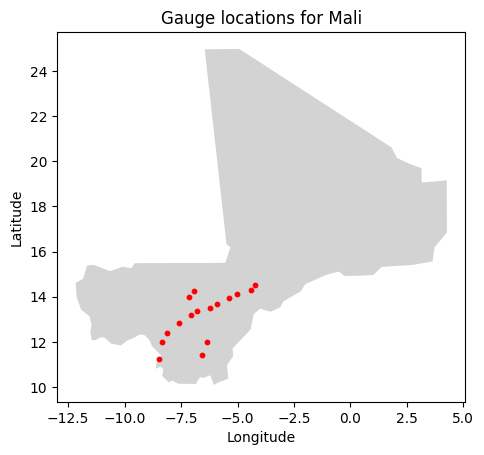

In [6]:
map_gauge_coordinates_of_country(
    df_Mali_gauge_models, 'Mali'
)

##### **Identify the gauges near the Niger river:**

In [13]:
df_Mali_gauge_coords = get_country_gauge_coords(df_Mali_gauge_models)
print(df_Mali_gauge_coords)

                   latitude  longitude
gaugeId                               
hybas_1120758950  11.427083  -6.581250
hybas_1120766460  11.222917  -8.485417
hybas_1120739110  11.977083  -6.360417
hybas_1120679780  13.493750  -6.202083
hybas_1121893090  14.131250  -5.039583
hybas_1120641660  14.506250  -4.206250
hybas_1121895840  13.956250  -5.360417
hybas_1120650110  14.277083  -6.927083
hybas_1121919510  12.410417  -8.106250
hybas_1120689830  13.210417  -7.077083
hybas_1120737100  12.018750  -8.322917
hybas_1120705070  12.835417  -7.581250
hybas_1121890140  14.314583  -4.422917
hybas_1121905290  13.360417  -6.789583
hybas_1121900350  13.685417  -5.893750
hybas_1120661040  13.985417  -7.152083


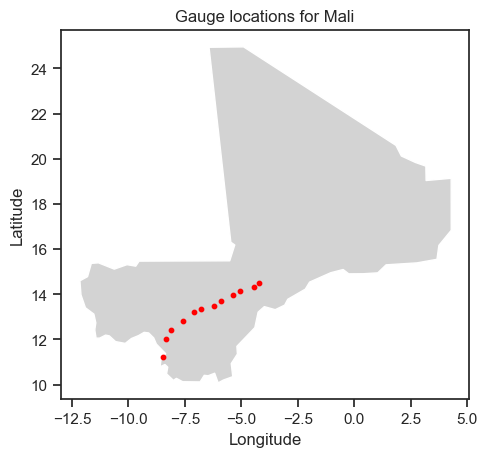

In [28]:
gauges_not_near_Niger = [
    'hybas_1120739110',
    'hybas_1120758950',
    'hybas_1120650110',
    'hybas_1120661040'
]

df_Mali_gauges_Niger = \
    df_Mali_gauge_models[~df_Mali_gauge_models['gaugeId'].isin(gauges_not_near_Niger)].copy()

map_gauge_coordinates_of_country(
    df_Mali_gauges_Niger, 'Mali'
)

In [29]:
df_Mali_gauges_Niger = df_Mali_gauges_Niger.sort_values(
    by = 'latitude',
    ascending = False).reset_index()
print(df_Mali_gauges_Niger['latitude'])

0     14.506250
1     14.314583
2     14.131250
3     13.956250
4     13.685417
5     13.493750
6     13.360417
7     13.210417
8     12.835417
9     12.410417
10    12.018750
11    11.222917
Name: latitude, dtype: float64


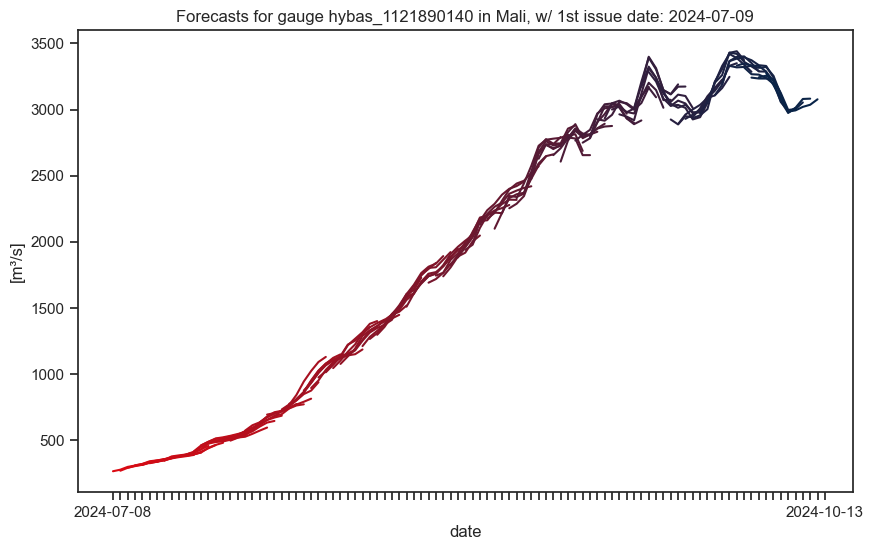

In [7]:
start_date = datetime.datetime.now() - datetime.timedelta(days = 90)

plot_x_days_of_gauge_forecast_for_issue_time(
    df_Mali_forecasts,                      # plot for Mali
    df_Mali_gauges['gaugeId'].to_list()[0], # plot for the first gauge
    start_date,                             # plot starts 90 days ago (relative to today)
    90,                                     # plot for 90 days (relative to start date)                                                  
    'Mali',                                 # country name (don't forget the capital letter)
)